<a href="https://colab.research.google.com/github/jiil1/AI4DL/blob/main/chapter05_fundamentals_of_ml_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [5]:
# rare features & suspicious correlations -> highly susceptible to overfitting
# lets see how it(noise) affects the performance

from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 # normalizing the pixel values

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1) # noise channels

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1) # all-zeros channels

In [6]:
# shuffle data

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [2]:
train_images.shape

(60000, 784)

In [3]:
len(train_images)

60000

In [4]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [5]:
np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1).shape

(60000, 1568)

In [6]:
train_images_with_noise_channels[0]

array([0.        , 0.        , 0.        , ..., 0.45399621, 0.14978964,
       0.95822491])

In [7]:
train_images_with_zeros_channels[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:
?np.random.random
# from Uniform dist.

**Training the same model on MNIST data with noise channels or all-zero channels**

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3157 - accuracy: 0.1049 - val_loss: 2.3075 - val_accuracy: 0.1075
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2981 - accuracy: 0.1172 - val_loss: 2.3115 - val_accuracy: 0.1076
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2902 - accuracy: 0.1286 - val_loss: 2.3137 - val_accuracy: 0.1004
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2777 - accuracy: 0.1398 - val_loss: 2.3239 - val_accuracy: 0.1041
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 2.2629 - accuracy: 0.1530 - val_loss: 2.3319 - val_accuracy: 0.1057
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2422 - accuracy: 0.1655 - val_loss: 2.3445 - val_accuracy: 0.1048
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.2196 - accuracy: 0.1798 - val_loss: 2.3595 - val_accuracy: 0.0989
Epoch 

In [17]:
history_original.history

{'loss': [2.3157100677490234,
  2.2980589866638184,
  2.290238618850708,
  2.2777342796325684,
  2.2629356384277344,
  2.2422361373901367,
  2.2196216583251953,
  2.191909074783325,
  2.1623475551605225,
  2.1314432621002197],
 'accuracy': [0.10493750125169754,
  0.1171875,
  0.12858332693576813,
  0.13977083563804626,
  0.15295833349227905,
  0.1655416637659073,
  0.179770827293396,
  0.1965000033378601,
  0.20999999344348907,
  0.22620832920074463],
 'val_loss': [2.3075273036956787,
  2.3115487098693848,
  2.3137481212615967,
  2.3239083290100098,
  2.331892490386963,
  2.344496488571167,
  2.3594565391540527,
  2.3778443336486816,
  2.411651372909546,
  2.4138054847717285],
 'val_accuracy': [0.10750000178813934,
  0.10758333653211594,
  0.10041666775941849,
  0.1040833368897438,
  0.10566666722297668,
  0.10483333468437195,
  0.0989166647195816,
  0.10374999791383743,
  0.1002499982714653,
  0.09958333522081375]}

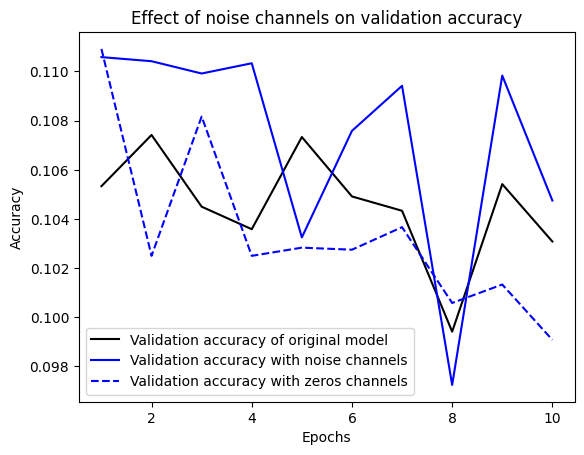

In [12]:
import matplotlib.pyplot as plt
val_acc_original = history_original.history["val_accuracy"]
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_original, "k-",
         label="Validation accuracy of original model")
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

**Plotting a validation accuracy comparison**

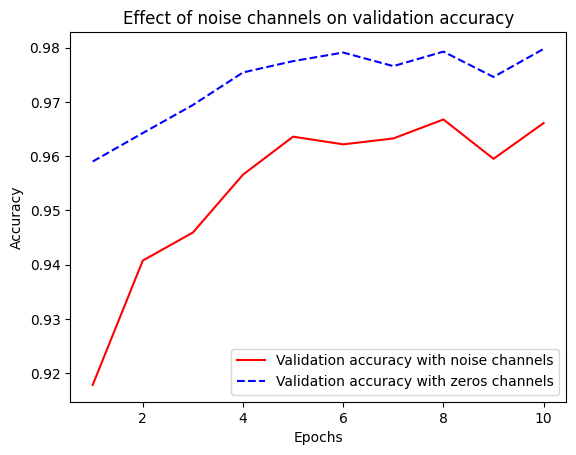

In [10]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "r-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [27]:
# can be trained to fit anything as long as they have "representational power"

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels) # even with shuffled labels (no relationship between inputs and labels) -> training loss goes down

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, 
                             epochs=100,
                             batch_size=128,
                             validation_split=0.2)

history_shuffled = model.fit(train_images, random_train_labels, 
                             epochs=100,
                             batch_size=128,
                             validation_split=0.2) # but naturally, the validation loss does not improve over time

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3154 - accuracy: 0.1036 - val_loss: 2.3059 - val_accuracy: 0.1066
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2996 - accuracy: 0.1150 - val_loss: 2.3092 - val_accuracy: 0.0985
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2918 - accuracy: 0.1266 - val_loss: 2.3136 - val_accuracy: 0.0994
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2796 - accuracy: 0.1397 - val_loss: 2.3213 - val_accuracy: 0.1048
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2638 - accuracy: 0.1512 - val_loss: 2.3329 - val_accuracy: 0.1017
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2430 - accuracy: 0.1664 - val_loss: 2.3447 - val_accuracy: 0.1001
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2207 - accuracy: 0.1824 - val_loss: 2.3641 - val_accuracy: 0.0962

ValueError: ignored

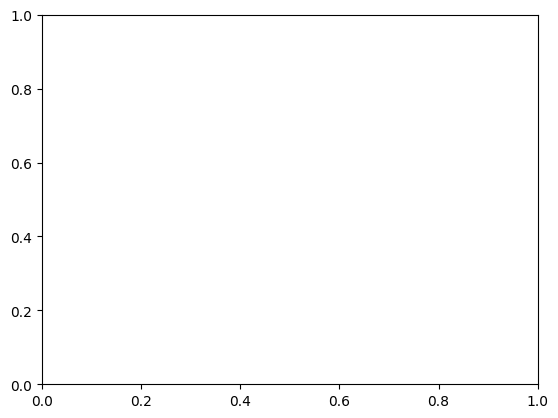

In [28]:
# training accuracy
import matplotlib.pyplot as plt
tr_acc = history.history["accuracy"]
tr_acc_shuffled = history_shuffled.history["accuracy"]
epochs = range(1, 11)
plt.plot(epochs, tr_acc, "k--",
         label="training accuracy of original model")
plt.plot(epochs, tr_acc_shuffled, "b-",
         label="training accuracy with noise channels")
plt.title("training meaningless data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

ValueError: ignored

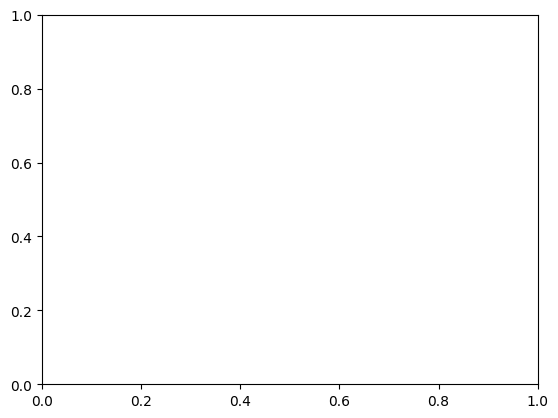

In [26]:
import matplotlib.pyplot as plt
val_acc = history.history["val_accuracy"]
val_acc_shuffled = history_shuffled.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "k--",
         label="Validation accuracy")
plt.plot(epochs, val_acc_shuffled, "b-",
         label="Validation accuracy of shuffled labels")
plt.title("Effect of shuffled labels")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

In [12]:
# Holdout validation


#num_validation_samples = 10000
#np.random.shuffle(data)
#validation_data = data[:num_validation_samples]
#training_data = data[num_validation_samples:]
#model = get_model()
#model.fit(training_data, ...)
#validation_score = model.evaluate(validation_data, ...)

# tune model -> retrain -> evaluate -> tune

#model = get_model()
#model.fit(np.concatenate([training_data, validation_data]), ...)
#test_score = model.evaluate(test_data, ...)
    # train final model from scratch on all non-test data available

#### K-fold validation

In [13]:
# K-fold cross-validation
# small sample size
# efficient data use

#k = 3
#num_validation_samples = len(data) // k
#np.random.shuffle(data)

#validation_scores = []
#for fold in range(k):
#    validation_data = data[num_validation_samples * fold:
#                           num_validation_samples * (fold + 1)] # select validation-data partition
#    training_data = np.concatenate(
#        data[:num_validation_samples * fold],
#        data[num_validation_samples * (fold + 1) :])
#    model = get.model()
#    model.fit(training_data, ...)
#    validation_score = model.evaluate(validation_data, ...)
#    validation_scores.append(validation_score)
#validation_score = np.average(validation_scores)
#model = get_model()
#model.fit(data, ...)
#test_score = model.evaluate(test_data, ...)


#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

common problems

    1) training loss does not go down
    2) model does not meaningfully generalize - training loss goes down but validation accuracy does not improve
    3) training & validation loss both go down but model still underfitting

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [29]:
# training does not get started - training loss does not improve at all
# problem with the configuration of the gradient descent process -> check optimizers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
# importance of normalized data -> default learning rate(0.01) is optimized for normalized data

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # learning rate too high - do not converge to the solution point
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_highlr = model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 623.5248 - accuracy: 0.3207 - val_loss: 2.0601 - val_accuracy: 0.2307
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5220 - accuracy: 0.2025 - val_loss: 2.2295 - val_accuracy: 0.1995
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7814 - accuracy: 0.1885 - val_loss: 2.2058 - val_accuracy: 0.1736
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3798 - accuracy: 0.1849 - val_loss: 2.4905 - val_accuracy: 0.2025
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6068 - accuracy: 0.1958 - val_loss: 2.4110 - val_accuracy: 0.1507
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3083 - accuracy: 0.1854 - val_loss: 2.2811 - val_accuracy: 0.1575
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5052 - accuracy: 0.1750 - val_loss: 2.3307 - val_accuracy: 0.1673
Epoc

In [34]:
history_highlr.history

{'loss': [623.5247802734375,
  2.5219969749450684,
  2.781407117843628,
  2.3797614574432373,
  2.606839895248413,
  2.30828595161438,
  2.505228281021118,
  2.334897041320801,
  2.4436802864074707,
  2.343994140625],
 'accuracy': [0.32074999809265137,
  0.20247916877269745,
  0.18850000202655792,
  0.1849375069141388,
  0.19581249356269836,
  0.18539583683013916,
  0.17497916519641876,
  0.17366667091846466,
  0.18468749523162842,
  0.18183332681655884],
 'val_loss': [2.060100793838501,
  2.2295289039611816,
  2.205813407897949,
  2.4905076026916504,
  2.411036968231201,
  2.2810585498809814,
  2.3306984901428223,
  2.2396059036254883,
  2.2286148071289062,
  2.1076788902282715],
 'val_accuracy': [0.23066666722297668,
  0.19949999451637268,
  0.17358332872390747,
  0.20250000059604645,
  0.15074999630451202,
  0.1574999988079071,
  0.16725000739097595,
  0.18783333897590637,
  0.18050000071525574,
  0.1811666637659073]}

**The same model with a more appropriate learning rate**

In [31]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # learning rate too low (update little by little - never converge to minimum)
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_lowlr = model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3260 - accuracy: 0.9116 - val_loss: 0.1577 - val_accuracy: 0.9535
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1250 - accuracy: 0.9648 - val_loss: 0.1233 - val_accuracy: 0.9688
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0955 - accuracy: 0.9752 - val_loss: 0.1592 - val_accuracy: 0.9683
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0826 - accuracy: 0.9781 - val_loss: 0.1699 - val_accuracy: 0.9673
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0719 - accuracy: 0.9822 - val_loss: 0.1725 - val_accuracy: 0.9712
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0629 - accuracy: 0.9853 - val_loss: 0.2070 - val_accuracy: 0.9682
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0577 - accuracy: 0.9858 - val_loss: 0.2115 - val_accuracy: 0.9715
Epoch 

In [32]:
history = model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0380 - accuracy: 0.9919 - val_loss: 0.2389 - val_accuracy: 0.9726
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0331 - accuracy: 0.9930 - val_loss: 0.2236 - val_accuracy: 0.9766
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.9930 - val_loss: 0.2518 - val_accuracy: 0.9750
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0271 - accuracy: 0.9940 - val_loss: 0.2743 - val_accuracy: 0.9736
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0213 - accuracy: 0.9953 - val_loss: 0.2631 - val_accuracy: 0.9743
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0230 - accuracy: 0.9951 - val_loss: 0.2682 - val_accuracy: 0.9781
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0212 - accuracy: 0.9952 - val_loss: 0.2800 - val_accuracy: 0.9764
Epoch 

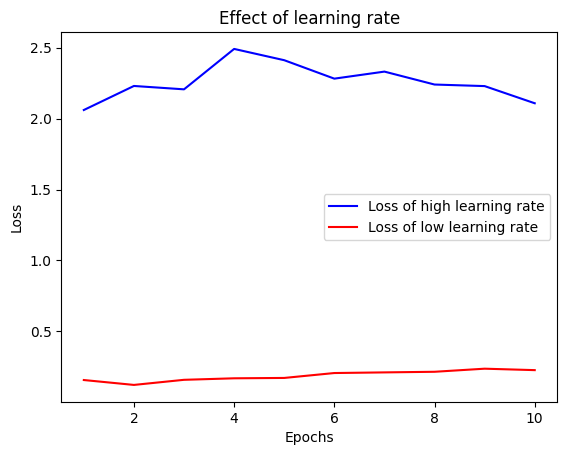

In [37]:
import matplotlib.pyplot as plt
high = history_highlr.history["val_loss"]
low = history_lowlr.history["val_loss"]
original = history.history["val_loss"]
epochs = range(1, 11)
plt.plot(epochs, high, "b-",
         label="Loss of high learning rate")
plt.plot(epochs, low, "r-",
         label="Loss of low learning rate")
#plt.plot(epochs, low, "k--",
#         label="Loss")
plt.title("Effect of learning rate")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Leveraging better architecture priors

    * model trains but does not generalize -> **model not suited for the problem**
    * best architecture for a variety of data modalities (images, texts, timeseries, etc.)

### Increasing model capacity

**A simple logistic regression on MNIST**

In [16]:
# manage to get to a model that fits(train & val loss going down) -> overfitting
# by increasing model capacity = use bigger model 

model = keras.Sequential([layers.Dense(10, activation="softmax")]) # simple/small
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6613 - accuracy: 0.8411 - val_loss: 0.3587 - val_accuracy: 0.9024
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3531 - accuracy: 0.9025 - val_loss: 0.3106 - val_accuracy: 0.9138
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3183 - accuracy: 0.9114 - val_loss: 0.2926 - val_accuracy: 0.9186
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3022 - accuracy: 0.9145 - val_loss: 0.2845 - val_accuracy: 0.9205
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2928 - accuracy: 0.9183 - val_loss: 0.2779 - val_accuracy: 0.9234
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2859 - accuracy: 0.9200 - val_loss: 0.2752 - val_accuracy: 0.9240
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2809 - accuracy: 0.9217 - val_loss: 0.2720 - val_accuracy: 0.9251
Epoch 

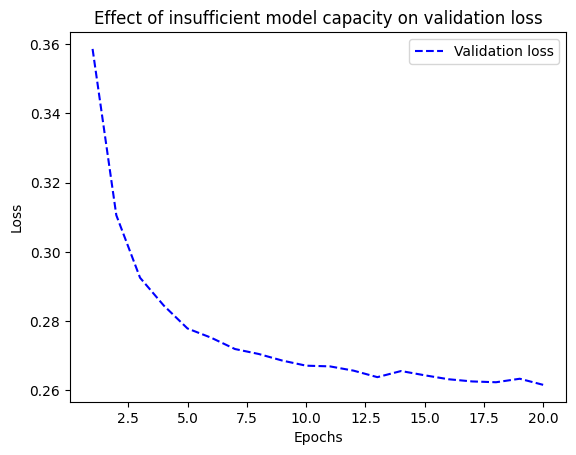

In [17]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# we do not know if this is our best -> likely a problem of representational power (probably the model is too simple)
# more capacity to learn data!

In [18]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3758 - accuracy: 0.8923 - val_loss: 0.1864 - val_accuracy: 0.9457
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1639 - accuracy: 0.9514 - val_loss: 0.1369 - val_accuracy: 0.9618
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1155 - accuracy: 0.9645 - val_loss: 0.1078 - val_accuracy: 0.9681
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0879 - accuracy: 0.9739 - val_loss: 0.1019 - val_accuracy: 0.9726
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0712 - accuracy: 0.9784 - val_loss: 0.0970 - val_accuracy: 0.9724
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0967 - val_accuracy: 0.9708
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.1006 - val_accuracy: 0.9711
Epoch 

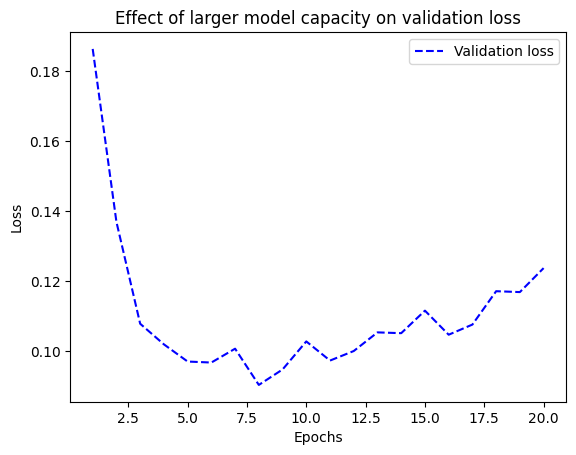

In [19]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of larger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# now we can see the minimum loss
# compare : loss(small) > loss(large) => better model
# time to fight with overfitting!

# model has shown itself to gain some generalization power = able to overfit
# now our focus switches to : maximizing generalization

## Improving generalization

### Dataset curation

    1. enough data
    2. minimize labeling errors
    3. clean your data - deal with missing values
    4. feature selection

### Feature engineering

* use domain knowledge about the data -> better algorithm
* by apply **hardcoded(non-learned) transformations** to the data
* good features - solve problems using *fewer resources*

### Using early stopping

### Regularizing your model

Regularization techniques

: set of best practices - actively impede model's ability to perfectly fit to the train data

    goal = model perform better during validation

#### Reducing the network's size

linear(underfit) vs. quadric vs. highly polynomial(overfit)


**Original model**

In [20]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 2s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5200 - accuracy: 0.7810 - val_loss: 0.3899 - val_accuracy: 0.8697
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3197 - accuracy: 0.8930 - val_loss: 0.3085 - val_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2381 - accuracy: 0.9219 - val_loss: 0.3763 - val_accuracy: 0.8410
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1943 - accuracy: 0.9365 - val_loss: 0.3351 - val_accuracy: 0.8615
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1647 - accuracy: 0.9460 - val_loss: 0.2894 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1393 - accuracy: 0.9551 - val_loss: 0.2913 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1196 - accurac

**Version of the model with lower capacity**

In [21]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6336 - accuracy: 0.7037 - val_loss: 0.5646 - val_accuracy: 0.8138
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5090 - accuracy: 0.8507 - val_loss: 0.4787 - val_accuracy: 0.8322
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4184 - accuracy: 0.8886 - val_loss: 0.4074 - val_accuracy: 0.8787
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3469 - accuracy: 0.9079 - val_loss: 0.3568 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2941 - accuracy: 0.9179 - val_loss: 0.3262 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2544 - accuracy: 0.9278 - val_loss: 0.3059 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2245 - accuracy: 0.9344 - val_loss: 0.2884 - val_accuracy: 0.8889
Epoch 8/20
30

**Version of the model with higher capacity**

In [22]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5567 - accuracy: 0.7298 - val_loss: 0.3511 - val_accuracy: 0.8551
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3336 - accuracy: 0.8597 - val_loss: 0.3294 - val_accuracy: 0.8622
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2416 - accuracy: 0.9043 - val_loss: 0.2939 - val_accuracy: 0.8775
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1896 - accuracy: 0.9264 - val_loss: 0.2750 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1399 - accuracy: 0.9463 - val_loss: 0.3233 - val_accuracy: 0.8769
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1223 - accuracy: 0.9547 - val_loss: 0.3252 - val_accuracy: 0.8787
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0871 - accuracy: 0.9717 - val_loss: 0.3355 - val_accuracy: 0.8837
Epoch 8/20
30

##### visualization

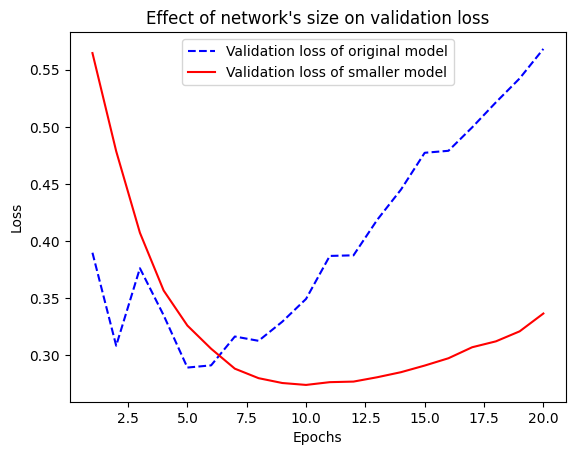

In [23]:
# original vs. smaller
original_val_loss = history_original.history["val_loss"]
smaller_val_loss = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, original_val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, smaller_val_loss, "r-",
         label="Validation loss of smaller model")
plt.title("Effect of network's size on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

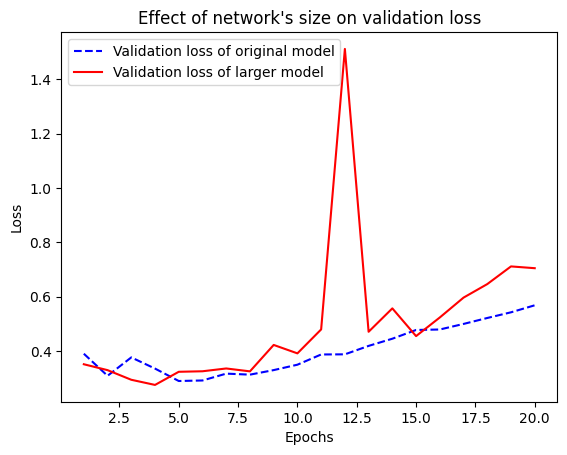

In [24]:
# original vs. larger
original_val_loss = history_original.history["val_loss"]
larger_val_loss = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, original_val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, larger_val_loss, "r-",
         label="Validation loss of larger model")
plt.title("Effect of network's size on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# overfits too quickly

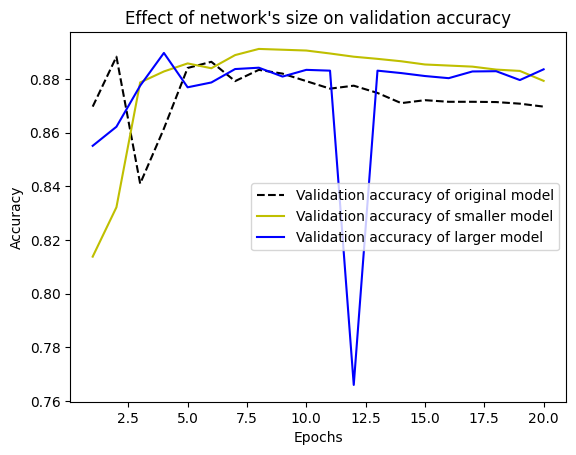

In [25]:
original_val_acc = history_original.history["val_accuracy"]
smaller_val_acc = history_smaller_model.history["val_accuracy"]
larger_val_acc = history_larger_model.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, original_val_acc, "k--",
         label="Validation accuracy of original model")
plt.plot(epochs, smaller_val_acc, "y-",
         label="Validation accuracy of smaller model")
plt.plot(epochs, larger_val_acc, "b-",
         label="Validation accuracy of larger model")
plt.title("Effect of network's size on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### Adding weight regularization

simpler models less likely to overfit (than complex ones)

    simpler = less entropy

L1(lasso) & L2(ridge) regularization - add penalty terms

**Adding L2 weight regularization to the model**

In [26]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002), # L2 regularization
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6064 - accuracy: 0.7795 - val_loss: 0.5026 - val_accuracy: 0.8246
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4060 - accuracy: 0.8900 - val_loss: 0.3897 - val_accuracy: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3354 - accuracy: 0.9125 - val_loss: 0.3626 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2999 - accuracy: 0.9240 - val_loss: 0.3576 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2777 - accuracy: 0.9326 - val_loss: 0.3689 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2659 - accuracy: 0.9338 - val_loss: 0.3580 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2527 - accuracy: 0.9402 - val_loss: 0.3618 - val_accuracy: 0.8845
Epoch 8/20
30

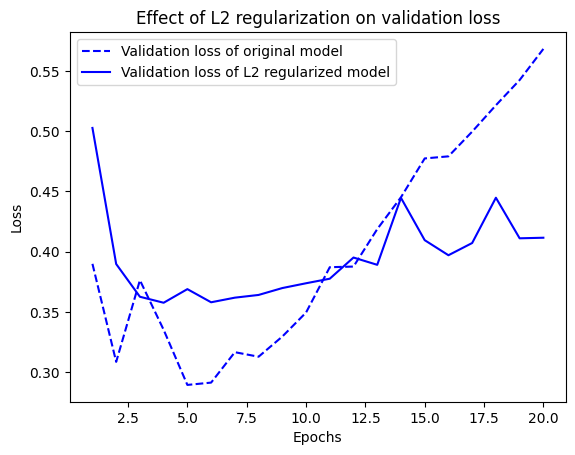

In [27]:
# visualization
original_val_loss = history_original.history["val_loss"]
val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, original_val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss, "b-",
         label="Validation loss of L2 regularized model")
plt.title("Effect of L2 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# not overfitting
# but lower performance (than original model) -> recommend dropout method!

**Different weight regularizers available in Keras**

In [28]:
from tensorflow.keras import regularizers
regularizers.l1(0.001) # L1 regularziation
regularizers.l1_l2(l1=0.001, l2=0.001) # simultaneous L1 and L2 regularization

#### Adding dropout

: randomly drop out(set to zero) a number of nodes/output features of the layer during training

heavy nodes(higher weights - model may depend a lot on) may drop-out

=> all the features have similar importance

**Adding dropout to the IMDB model**

In [29]:
# 1)
#layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
# multiplying -> random 0 values on 50% chance -> drops out 50% of units in the output
# at testing time
#layer_output *= 0.5 # sclaing down activation - nonzero units twice the active

# OR
# 2)
# at training time
#layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
#layer_output /= 0.5 # scaling up activation
# (implemented in Keras)

In [30]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5), # add drop-out layer
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6321 - accuracy: 0.6329 - val_loss: 0.5124 - val_accuracy: 0.8356
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5082 - accuracy: 0.7685 - val_loss: 0.4010 - val_accuracy: 0.8696
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4208 - accuracy: 0.8248 - val_loss: 0.3447 - val_accuracy: 0.8689
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3652 - accuracy: 0.8613 - val_loss: 0.2972 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3132 - accuracy: 0.8846 - val_loss: 0.2809 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2762 - accuracy: 0.8992 - val_loss: 0.2736 - val_accuracy: 0.8909
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2494 - accuracy: 0.9131 - val_loss: 0.2781 - val_accuracy: 0.8895
Epoch 8/20
30

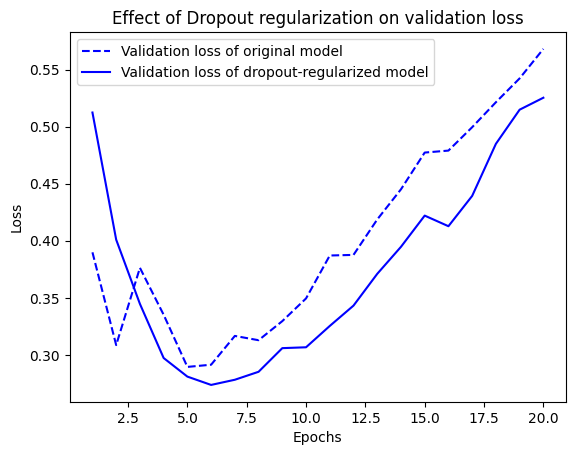

In [31]:
# visualization
original_val_loss = history_original.history["val_loss"]
val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, original_val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss, "b-",
         label="Validation loss of dropout-regularized model")
plt.title("Effect of Dropout regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# not overfitting
# better performance

## Summary